<a href="https://colab.research.google.com/github/Heal-me-KI/KI_Task/blob/main/EndTermTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hilmy Ismail Hidayat**

**2206048575**

**Tugas Akhir KI**

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 147s 9s/step - accuracy: 0.7502 - loss: 0.7402 - val_accuracy: 0.7967 - val_loss: 0.5142
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 138s 9s/step - accuracy: 0.7954 - loss: 0.4299 - val_accuracy: 0.8049 - val_loss: 0.4417
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 141s 9s/step - accuracy: 0.8698 - loss: 0.2924 - val_accuracy: 0.7805 - val_loss: 0.5451
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 143s 9s/step - accuracy: 0.8861 - loss: 0.2440 - val_accuracy: 0.8211 - val_loss: 0.4366
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 141s 9s/step - accuracy: 0.9407 - loss: 0.1929 - val_accuracy: 0.8130 - val_loss: 0.5292
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 143s 9s/step - accuracy: 0.9040 - loss: 0.2280 - val_accuracy: 0.8130 - val_loss: 0.4253
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 196s 9s/step - accuracy: 0.9570 - loss: 0.1283 - val_accuracy: 0.8130 - val_loss: 0.4395
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 142s 9s/step - accurac

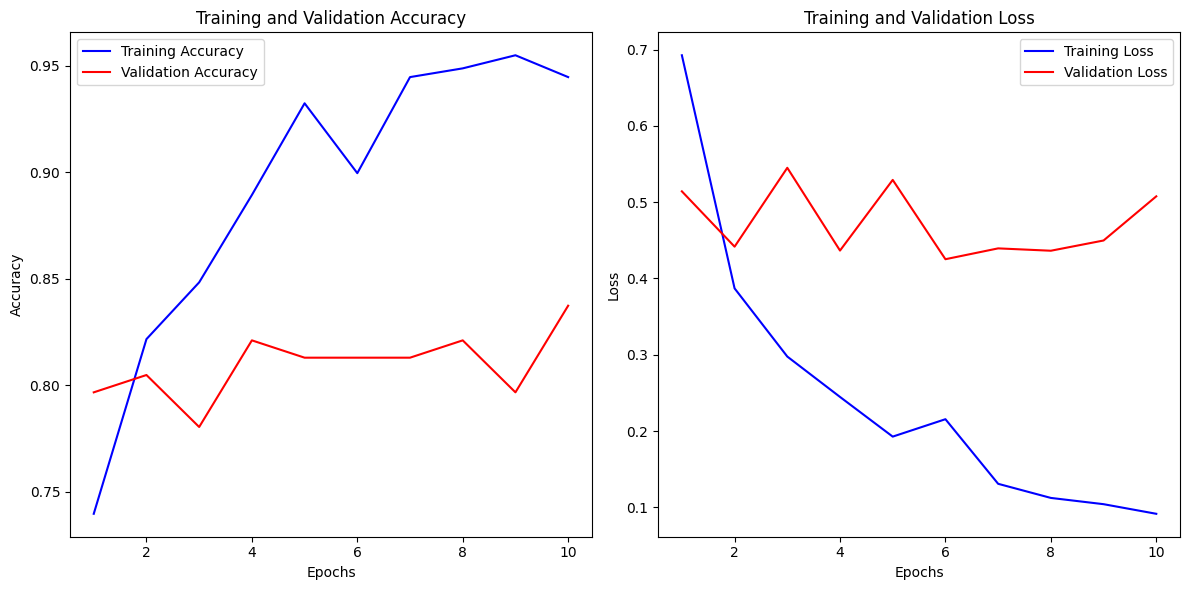

5/5 ━━━━━━━━━━━━━━━━━━━━ 40s 8s/step


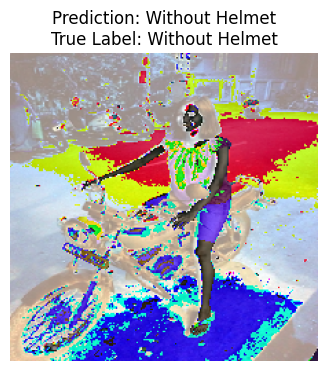

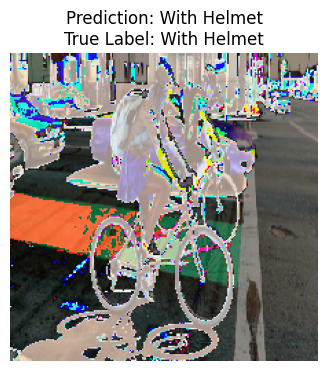

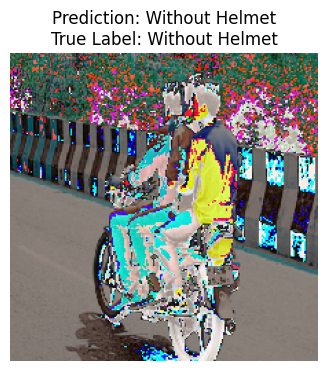

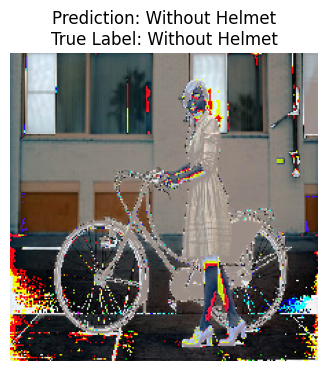

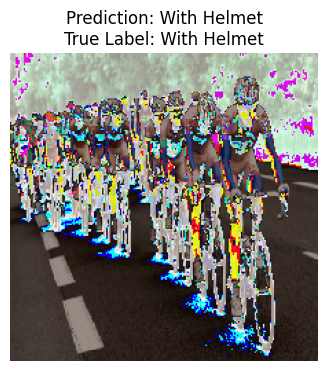

In [4]:
# Import necessary libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from lxml import etree
import matplotlib.pyplot as plt

# Define paths to annotation and image directories
images_dir = '/content/drive/My Drive/images'  # Replace with your images directory
annotations_dir = '/content/drive/My Drive/annotations'  # Replace with your annotations directory

# Define classes
classes = ['With Helmet', 'Without Helmet']

# Parse XML annotations
def parse_annotation(annotation_file):
    tree = etree.parse(annotation_file)
    root = tree.getroot()
    objects = []
    for obj in root.findall('object'):
        obj_struct = {}
        obj_struct['name'] = obj.find('name').text
        bbox = obj.find('bndbox')
        obj_struct['bbox'] = [int(bbox.find('xmin').text), int(bbox.find('ymin').text),
                              int(bbox.find('xmax').text), int(bbox.find('ymax').text)]
        objects.append(obj_struct)
    return objects

# Load images and annotations
def load_data(annotations_dir, images_dir):
    X, y = [], []
    for annotation_file in os.listdir(annotations_dir):
        if annotation_file.endswith('.xml'):
            annotation_path = os.path.join(annotations_dir, annotation_file)
            objects = parse_annotation(annotation_path)
            image_path = os.path.join(images_dir, annotation_file.replace('.xml', '.png'))
            image = load_img(image_path, target_size=(224, 224))
            image = img_to_array(image)
            X.append(preprocess_input(image))
            labels = [0] * len(classes)
            for obj in objects:
                label_idx = classes.index(obj['name'])
                labels[label_idx] = 1
            y.append(labels)
    return np.array(X), np.array(y)

# Load and preprocess data
X, y = load_data(annotations_dir, images_dir)

# Split the data into training and testing datasets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN model
def create_model():
    base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    for layer in base_model.layers:
        layer.trainable = False
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    output = layers.Dense(len(classes), activation='sigmoid')(x)
    model = models.Model(inputs=base_model.input, outputs=output)
    return model

# Compile model
model = create_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plot training and validation accuracy and loss
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Plot accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Display sample predictions
def show_predictions(model, X_test, y_test, num_samples=5):
    predictions = model.predict(X_test)
    predictions = np.argmax(predictions, axis=1)
    ground_truth = np.argmax(y_test, axis=1)

    for i in range(num_samples):
        plt.figure(figsize=(4, 4))
        plt.imshow(X_test[i].astype("uint8"))
        plt.axis('off')
        plt.title(f"Prediction: {classes[predictions[i]]}\nTrue Label: {classes[ground_truth[i]]}")
        plt.show()

# Plot training history
plot_training_history(history)

# Display test results
show_predictions(model, X_test, y_test, num_samples=5)


In [5]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

5/5 ━━━━━━━━━━━━━━━━━━━━ 30s 6s/step - accuracy: 0.8253 - loss: 0.4653
Test accuracy: 80.39%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
With Helmet: 0.97
Without Helmet: 0.01
Predicted Class: With Helmet


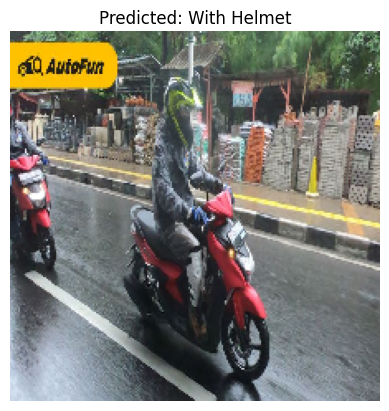

In [6]:
# Predict class for a new image
def predict_new_image(model, image_path, classes):
    # Load and preprocess the image
    image = load_img(image_path, target_size=(224, 224))
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    image_array = preprocess_input(image_array)

    # Predict using the model
    prediction = model.predict(image_array)

    # Output prediction
    for idx, class_name in enumerate(classes):
        print(f"{class_name}: {prediction[0][idx]:.2f}")

    # Determine the predicted class
    predicted_class = classes[np.argmax(prediction)]
    print(f"Predicted Class: {predicted_class}")

    # Display the image with the prediction
    plt.imshow(image)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

# Example usage
new_image_path = 'Test.jpg'  # Replace with the path to your image
predict_new_image(model, new_image_path, classes)
